<a href="https://colab.research.google.com/github/cagutierrezgu/My_Portfolio/blob/main/Faces%20and%20gender%20prediction/Data%20preparation/Data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading and preprocessing

Para empezar, se importarán todas las librerías y métodos a usar para el procesamiento, modelación y evaluación de las imágenes a usar posteriormente:

In [ ]:
# Librerías a usar
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
# Elementos para construir las redes neuronales
# Tipos de capas
from tensorflow.keras.layers import Dropout, GlobalMaxPooling2D
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
# Inicializadores del kernel
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
# Definición y carga de modelos
from tensorflow.keras.models import Model, load_model
# Regularizadores para evitar sobreajuste
from tensorflow.keras.regularizers import l2
# Callbacks al entrenar modelos
from tensorflow.keras.callbacks import ModelCheckpoint
# Tratamiento de imágenes
from tensorflow.keras.preprocessing.image import load_img
# Modelo preentrenado
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

# Evaluación de modelos
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

# Semillas para los tratamientos aleatorios
tf.random.set_seed(60)
np.random.seed(60)

El siguiente paso consiste en descomprimir el archivo que contiene todas las imágenes que se usarán a lo largo de este proyecto. Es indispensable que se descargue el archivo comprimido que contiene las imágenes de la web [**Kaggle**](https://www.kaggle.com/datasets/jangedoo/utkface-new), una vez hecho:

In [ ]:
!unzip faces.zip

Posteriormente, seleccionamos las imágenes de la carpeta `UTKFace/`, extraemos los nombres de cada imagen y verificamos el número de estas con las que se dispone:

In [ ]:
# Ubicación de las imágenes
path='UTKFace'
files=os.listdir(path)
print(len(files))
print(files[0])

23708
58_0_0_20170111195225616.jpg.chip.jpg


Los nombres de las imágenes contienen toda la información necesaria de etiquetas para crear modelos de aprendizaje automático, ya que todos los nombres son de la forma: `EDAD_GENERO_ETNIA_#################...`, donde la edad está dada de forma numérica en años como un objeto tipo `int`, el género y la etnia también están representados numéricamente entre 0 y 1, y 0 y 4 respectivamente. En el caso del género 0 es para masculino y 1 para femenino. Los números que se encuentran después de estas características descritas están relacionados con la fecha de modificación de la imagen y otras particularidades que no se usarán en este proyecto, al igual que la etnia.

Teniendo en cuenta lo anterior, se extraerán las edades y el género de cada imagen para almacenarlas en variables de python, ya que estas son las características que se usarán más adelante:

In [ ]:
# Aleatorización de almacenamiento de las imágenes
np.random.shuffle(files)

# Almacenamiento de etiquetas y nombres de las imágenes
age_labels, gender_labels, image_path = [], [], []

for file in files:
    image_path.append(file)
    temp = file.split('_')
    age_labels.append(temp[0])
    gender_labels.append(temp[1])

print(age_labels[10])
print(gender_labels[10])

34
0


Una vez se tienen las etiquetas almacenadas y los nombres de las imágenes para su posterior carga, se guardarán en un dataframe para compactar todos los datos con los que se cuenta:

In [ ]:
# Organización de datos en dataframe
images = pd.DataFrame()
images['image'], images['age'], images['genero'] = image_path, age_labels, gender_labels

Además, debido a que el número de imágenes es bastante elevado, se trabajará con un subconjunto de la totalidad por temas de computo y almacenamiento en la RAM a la hora de ejecutar los modelos:

In [ ]:
images1 = images.iloc[:6000]

In [ ]:
images1.head(10)

,image,age,genero
0,5_1_1_20170103180249368.jpg.chip.jpg,5,1
1,52_0_4_20170103183610052.jpg.chip.jpg,52,0
2,29_0_1_20170117194427746.jpg.chip.jpg,29,0
3,3_1_4_20170103212708915.jpg.chip.jpg,3,1
4,30_0_2_20170117202816104.jpg.chip.jpg,30,0
5,82_0_0_20170111224022146.jpg.chip.jpg,82,0
6,23_0_2_20170116172906979.jpg.chip.jpg,23,0
7,63_0_3_20170117195002527.jpg.chip.jpg,63,0
8,8_1_0_20170109204901514.jpg.chip.jpg,8,1
9,23_1_0_20170116221809969.jpg.chip.jpg,23,1


Es necesario convertir los datos de edad y género a un tipo de variable conveniente para los posteriores tratamientos, en especial para la exploración de los datos:

In [ ]:
images1 = images1.astype({'age':'float32', 'genero': 'int32'})

Así mismo, se almacena en un diccionario el respectivo significado de las etiquetas para el género de las personas:

In [ ]:
genero = {0:"Masculino", 1:"Femenino"}

Como un primer acercamiento a las imágenes con las que se va a trabajar, a continuación se muestran 4 de ellas de manera aleatoria:

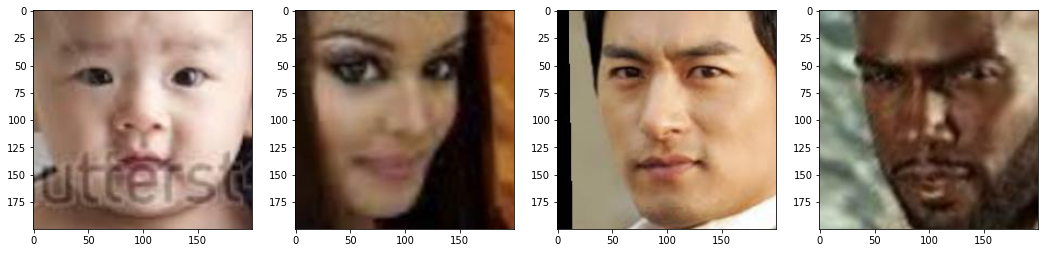

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18,10))

# Selección de imágenes aleatorias
random = np.random.randint(0, len(files), (4))
for i in range(len(random)):
  imag = plt.imread('UTKFace/'+files[random[i]])
  axes[i].imshow(imag);